#  Проект: Обучение с учителем: качество модели

# Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. 

**Цель**

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность:

- нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- в исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Подход к решению**

- Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
- Нужно собрать данные по клиентам по следующим группам:
1. Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
2. Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
3. Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
4. Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

**Описание данных** 

Данные для работы находятся в нескольких таблицах. 

market_file.csv - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

market_money.csv - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

market_time.csv - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

money.csv - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

**Инструкция**

1. Разработать модель, которая предскажет вероятность снижения покупательской активности.
2. Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. Использовать данные моделирования, данные о прибыли покупателей и исходные данные.

# 1. Загрузка данных

In [1]:
!pip install "matplotlib==3.8.4"
!pip install "seaborn==0.13.2"

!pip install phik
!pip install shap
!pip install -U scikit-learn


  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 2.0.2 which is incompatible.
  Using cached numpy-1.24.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [2]:
import pandas as pd
import seaborn as sns
import phik
import numpy as np
import scipy.stats as st
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import shap



from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from phik import phik_matrix
from phik.report import plot_correlation_matrix


In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ",")

In [4]:
def check_df(df):    
    display(df.info())   
    display(df.head())

In [5]:
check_df(market_file)
check_df(market_money)
check_df(market_time)
check_df(money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Вывод:** на первый взгляд в датасетах нет пропусков. Название колонок нужно привести к единому регистру. Тип данных соответсвует значениям в колонках. Есть очевидные ошибки в строках, например, предыдцщий_месяц. Необходимо проверить наличие явных и неявных дубликатов. 

# 2. Предобработка данных

Переведем все названия колонок в нижний регистр и добавим нижнее подчеркивание, для приведения к змеиному регистру. 

In [6]:
market_file.columns = market_file.columns.str.replace(' ', '_').str.lower()
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [7]:
market_money.columns = market_money.columns.str.lower()
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [8]:
market_time.columns = market_time.columns.str.lower()
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [9]:
money.columns = money.columns.str.lower()
money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Теперь проверим наличие пропусков и дубликатов.

In [10]:
def check_df1(df):
    display(df.isna().sum())   
    display(df.duplicated().sum())

In [11]:
check_df1(market_file)
check_df1(market_money)
check_df1(market_time)
check_df1(money)

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

0

id         0
период     0
выручка    0
dtype: int64

0

id        0
период    0
минут     0
dtype: int64

0

id         0
прибыль    0
dtype: int64

0

Пропусков и явных дубликатов нет. Проверим неявные дубликаты.

In [12]:
market_file['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

In [13]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [14]:
market_file['разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

In [15]:
market_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

В датасете market_file поправим тип сервиса "стандартт" на "стандарт".

In [16]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].str.replace('стандартт', 'стандарт')
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [17]:
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [18]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

В датасете market_time изменим период "предыдцщий_месяц" на "предыдущий_месяц".

In [19]:
market_time['период'] = market_time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

**Вывод:** на данном этапе привели названия столбцов к единому регистру. Пропусков и явных дубликатов не было обнаружено. Убрали ошибки в строках.

# 3.  Исследовательский анализ данных

Построим гистограммы и диаграммы рассеяния для количественных признаков и гистограмму для категориальных признаков. Напишем функции для построения графиков.

In [20]:
def hist_box_plot(df, column):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], color='Green', kde=True, bins=10)
    plt.title(f'Гистограмма {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Количество')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='Red')
    plt.title(f'Диаграмма рассеяния {column}')
    plt.ylabel('Количество')
    
def bar_plot(df, column):
    plt.figure(figsize=(12,10))
    sns.barplot(y=column, x=df.index, data=df)
    plt.title(f'Рапределение по {column}')
    plt.xlabel('Количество')
    
def pivot_table_plot(df, column):
    plt.figure(figsize=(10,8))
    sns.barplot(x=column, y=df.index, data=df)
    plt.title(f'Рапределение по {column}')
    
    
def count_box_plot(df, column):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=column, data=df)
    plt.title(f'Диаграмма {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Количество')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column], color='Red')
    plt.title(f'Диаграмма рассеяния {column}')
    plt.ylabel('Количество')


## 3.1 Анализ датасета market_file.

Отберем количественные и категориальные признаки датасета market_file и используем функции для построения графиков и диаграмм.

In [21]:
market_file_num = ['маркет_актив_6_мес', 
                  'длительность', 
                  'акционные_покупки']

In [22]:
market_file_cat =['покупательская_активность',
                 'тип_сервиса',
                 'разрешить_сообщать',
                 'популярная_категория']

In [23]:
market_file_disc = ['маркет_актив_тек_мес',
                   'средний_просмотр_категорий_за_визит',
                   'неоплаченные_продукты_штук_квартал',
                   'ошибка_сервиса',
                   'страниц_за_визит']

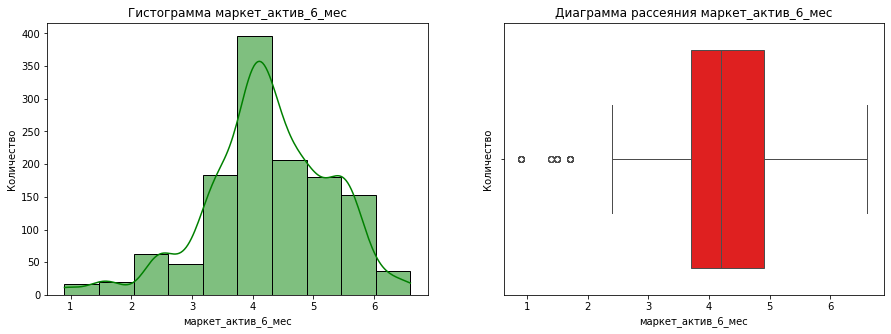

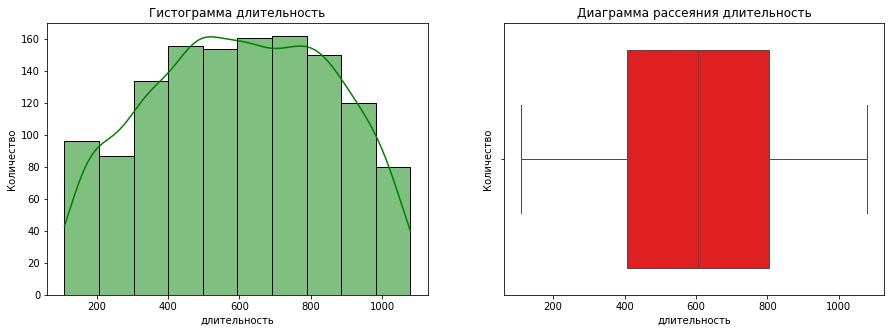

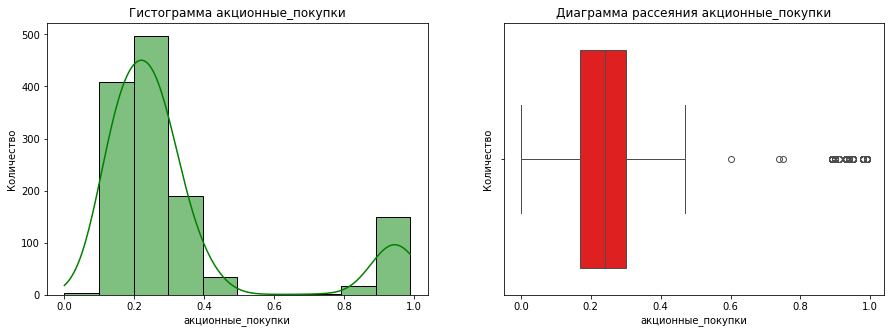

In [24]:
for column in market_file_num:
    hist_box_plot(market_file, column)

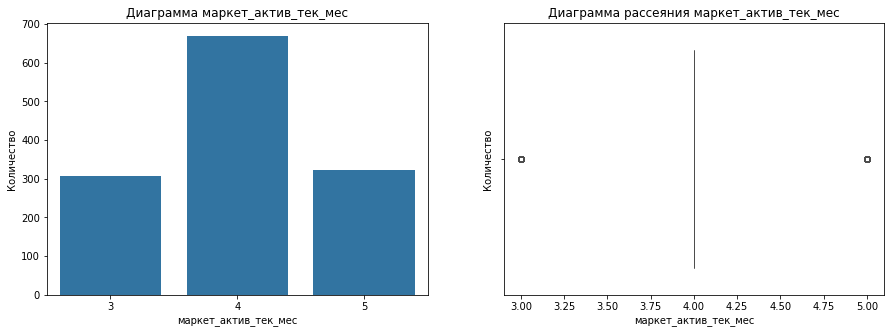

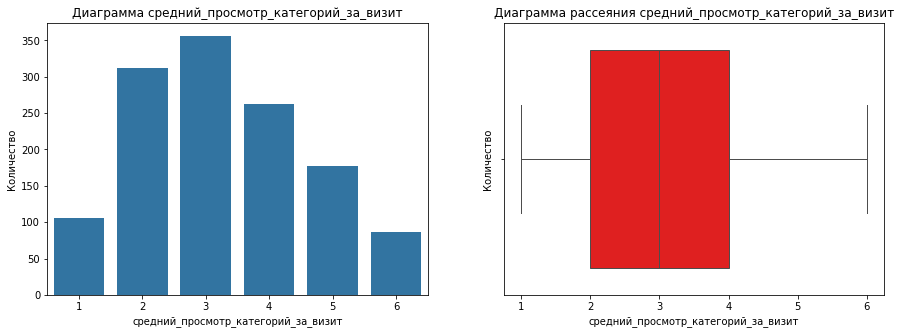

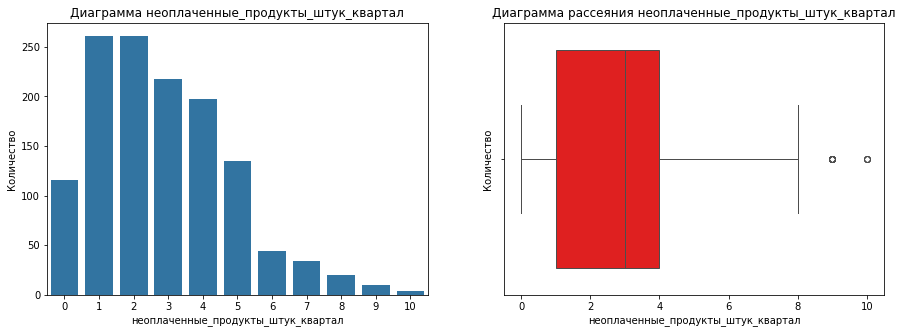

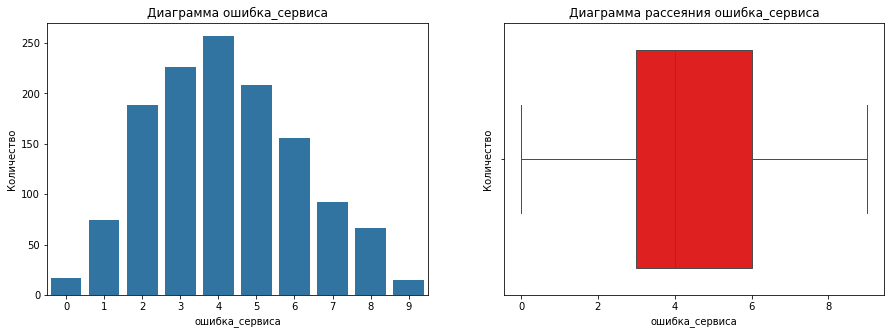

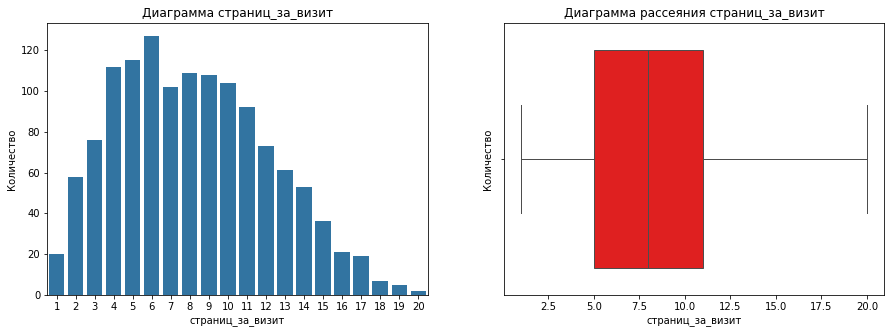

In [25]:
for column in market_file_disc:
    count_box_plot(market_file, column)

- среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяце - в среднем приходится от 3 от 5 коммуникаций. Диаграмма рассеяния показывает выбросы слева, эти же значения выбиваются и на гистограмме.

- значение длительность - выбросов не наблюдается. Большая часть покупателей зарегистрированы на сайте от 400 до 800 дней.

- акционные покупки - достаточно много пользователей покупают товары во время акций.

- количество маркетинговых коммуникаций в текущем месяце - маркетинговых коммуникаций было 3,4 или 5 раз, чаще всего таких коммуникаций 4.

- средний просмотр категорий за визит - в целом большая часть пользователей просматривают от 2 до 4 категорий за визит.
 
- неоплаченные продукты штук квартал - наблюдаются выбивающиеся значения в количестве 9, 10 штук. Большая часть пользователей имеют в среднем от 1 до 5 неоплаченных товаров в корзине.
 
- ошибка сервиса - большая часть пользователей сталкиваются с ошибками от 2 до 6 раз.
 
- среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца - большая часть пользователей просматриет от 2 до 14 страниц за визит.


Перейдем к категориальным признакам.

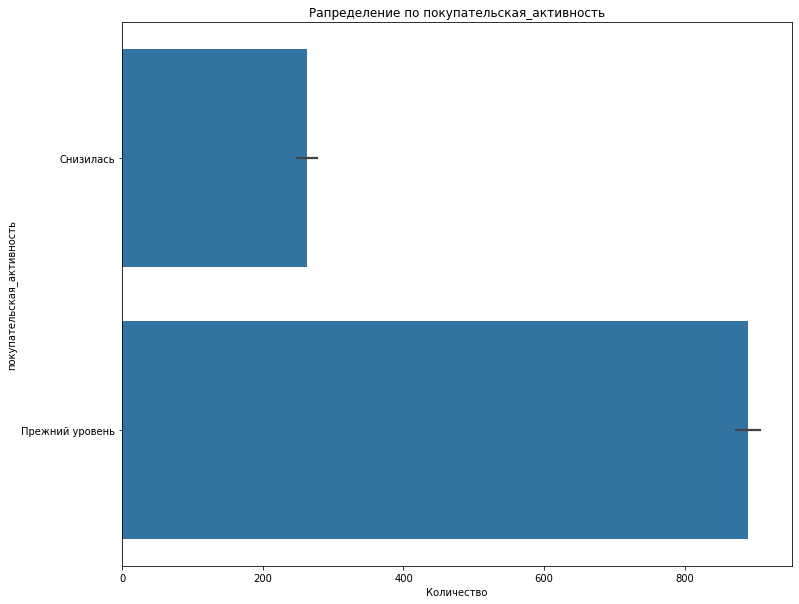

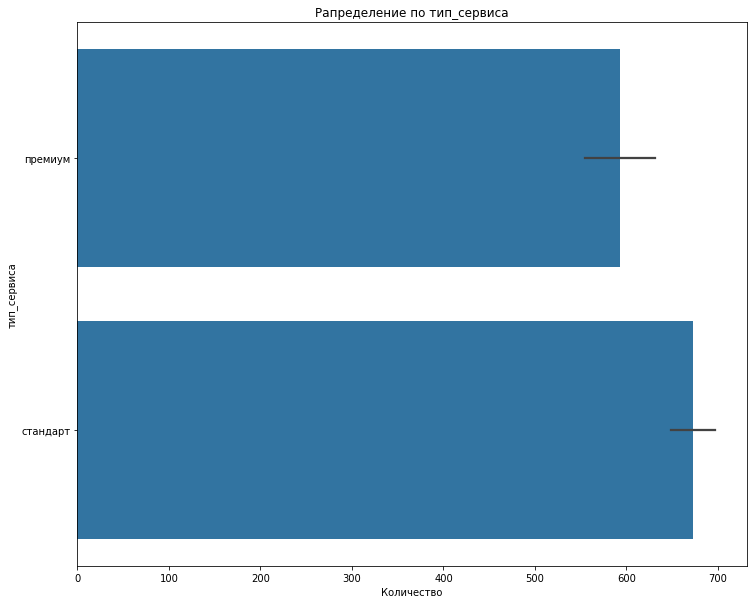

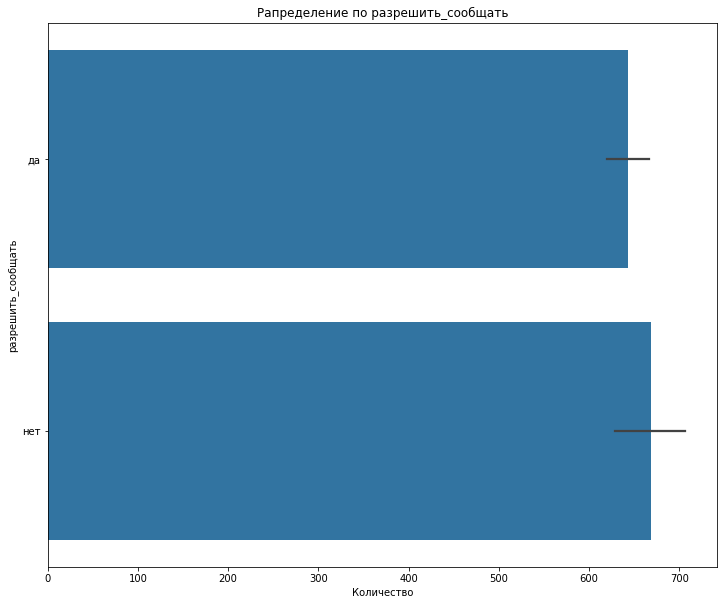

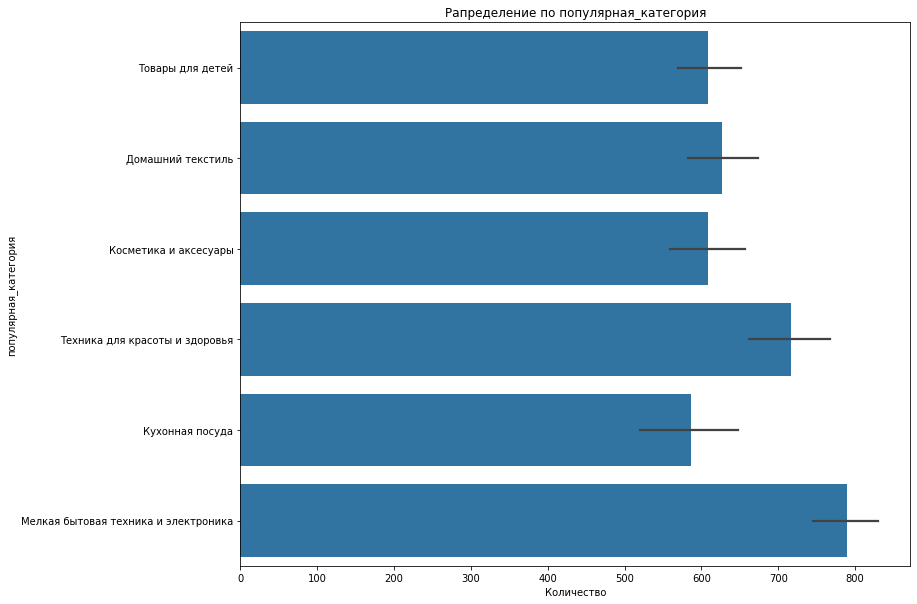

In [26]:
for column in market_file_cat:
    bar_plot(market_file, column)

In [27]:
market_file['покупательская_активность'].value_counts()

Прежний уровень    802
Снизилась          498
Name: покупательская_активность, dtype: int64

In [28]:
market_file['тип_сервиса'].value_counts()

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

In [29]:
market_file['разрешить_сообщать'].value_counts()

да     962
нет    338
Name: разрешить_сообщать, dtype: int64

In [30]:
market_file['популярная_категория'].value_counts()

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: популярная_категория, dtype: int64

- покупательская активность у большинства пользователей находится на прежнем уровне. У 498 пользователей снизилась.

- большая часть покупателей имеют уровень сервиса стандарт

- большая часть покупателей разрешают присылась дополнительные предложения о товаре.

- самая популярная категория товаров - товары для детей, на втром месте домашний текстиль, на третем косметика и аксессуары, менее всех популярна категория - кухонная посуда.


## 3.2 Анализ датасета market_money.

In [31]:
market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Наблюдается сильно выбивающееся максимальное значение выручки. Проверим к какому пользователю относится данное значение. 

In [32]:
market_money.query('выручка ==106862.2')

,id,период,выручка
98,215380,текущий_месяц,106862.2


Нашелся пользователь 215380. Проверим выручку за предыдущие месяцы.

In [33]:
market_money.query('id ==215380')

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


Странный разброс в суммах.Либо это техническая ошибка при переносе данных, либо пользователь действительно купил товары на эту сумму. Построим диаграммы рассеяния с учетом выброса и без.

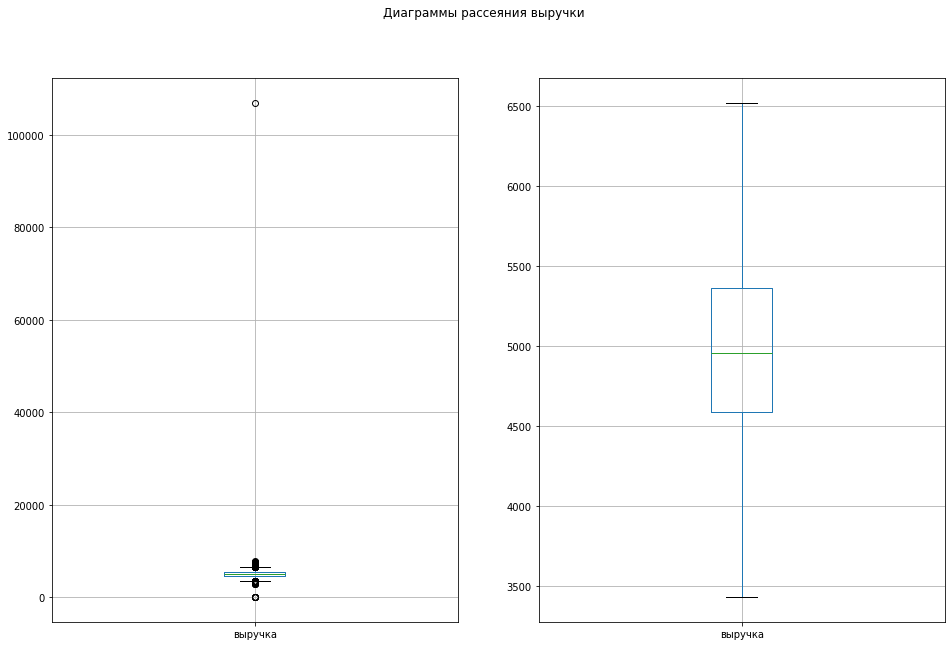

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
market_money.boxplot(column='выручка', ax=axes[0])
market_money.boxplot(column='выручка', showfliers=False, ax=axes[1])

plt.suptitle('Диаграммы рассеяния выручки')
plt.show()

Так как у нас всего один пользователь с таким сильно выбивающимся значением, удалим его из выборки. 

In [35]:
market_money = market_money[market_money['выручка'] < 9000]

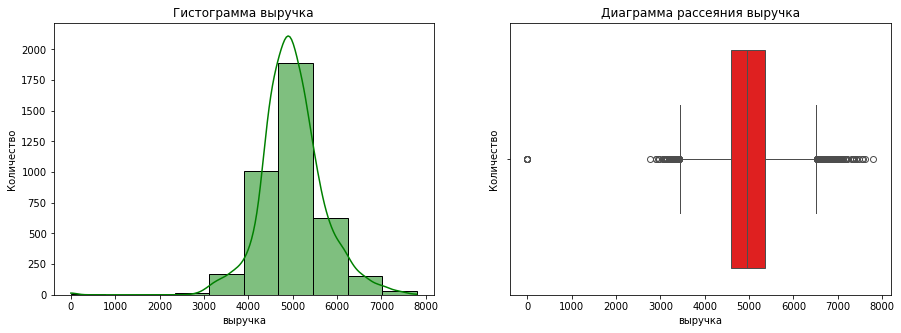

In [36]:
hist_box_plot(market_money, 'выручка')

Все еще есть выбросы с обеих сторон, но они не критичны. Теперь проверим выручку с разбивкой на периоды.

In [37]:
market_money_period = market_money.pivot_table(index='период', values=['выручка'], aggfunc='sum')
market_money_period

,выручка
период,
предыдущий_месяц,6417996.5
препредыдущий_месяц,6272769.0
текущий_месяц,6802586.9


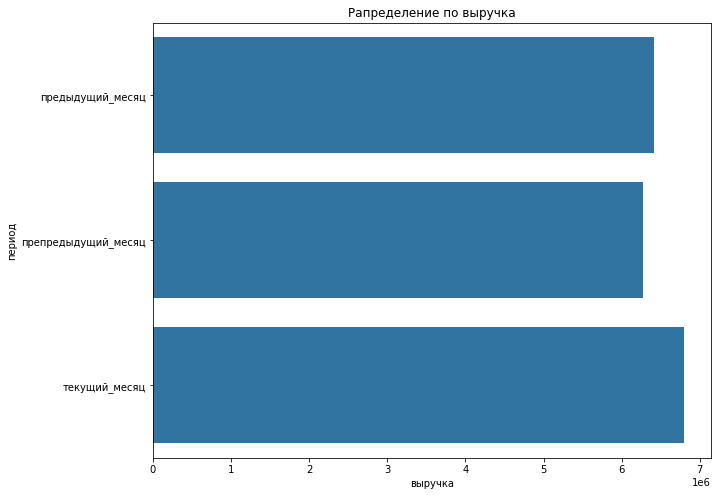

In [38]:
pivot_table_plot(market_money_period, 'выручка')

В текущем месяце выручка больше, чем за последние два предыдущих месяца.

## 3.3 Анализ датасета market_time.

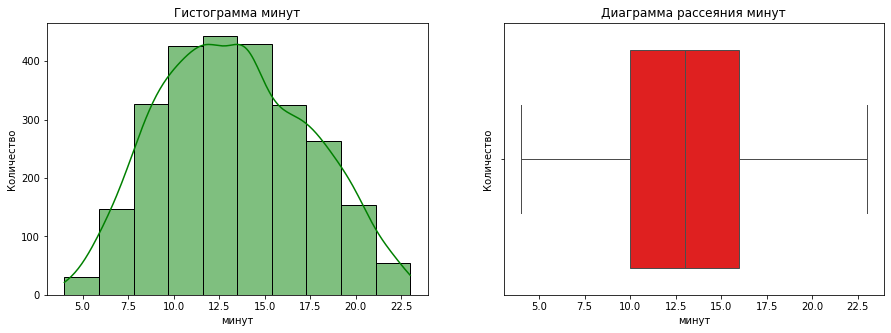

In [39]:
hist_box_plot(market_time, 'минут')

Гистограмма времени , которое покупатель провел на сайте , имеет нормальное распределение. Большая часть пользователей проводит на сайте от 10 до 16 минут. Теперь проверим с разбивкой на периоды.

In [40]:
market_time_period = market_time.pivot_table(
    index='период',
    values=['минут'],
    aggfunc='sum'
)

market_time_period

,минут
период,
предыдущий_месяц,17508
текущий_месяц,17166


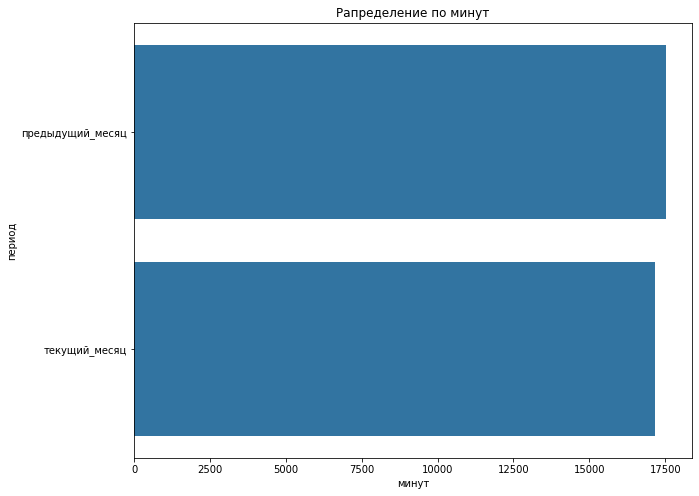

In [41]:
pivot_table_plot(market_time_period, 'минут')

Время, проведенное на сайте, почти одинаковон за предыдущий и текущий месяц.


## 3.4 Анализ датасета money.

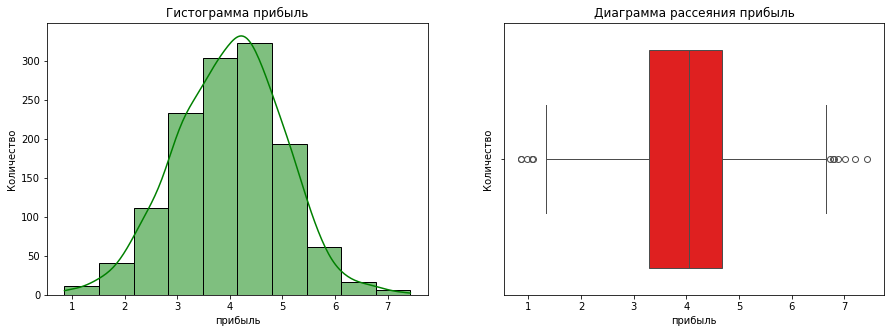

In [42]:
hist_box_plot(money, 'прибыль')

Прибыль магазина имеет нормальное распределение с выбросами с обеих сторон.


## 3.5 Отбор клиентов с покупательской активностью не менее трёх месяцев.


Теперь отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Всего мы имеет два периода - предыдущий и текущий период в датасете с выручком market_money. Найдем пользователей, чья  выручка равнается 0.

In [43]:
market_money.query('выручка == 0.0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Всего нашлось 3 пользователя с прибылью 0 в предыдущих месяцах. Также стоит удалить из датасета данные за предыдущие месяцы по пользователю 215380, так как мы решили удалить сильно выбивающиеся значение выручки из датасета. Выведем этих пользователей из всех датасетов.

In [44]:
market_file = market_file.query('id !=[215348, 215357, 215359, 215380]')
market_money = market_money.query('id !=[215348, 215357, 215359, 215380]')
market_time = market_time.query('id !=[215348, 215357, 215359, 215380]')
money = money.query('id !=[215348, 215357, 215359, 215380]')

print('market_time:', len(market_file))
print('market_money:', len(market_money))
print('market_time:', len(market_time))
print('money:', len(money))

market_time: 1296
market_money: 3888
market_time: 2592
money: 1296


**Вывод:** на данном этапе провели исследовательский анализ данных всех датасетов. Все результаты приведены отдельно в каждом подпункте данного шага. Выявили троих пользователей, которые не совершали покупкие последние 3 месяца. Обновили все датасеты с учетов этих данных.


# 4. Объединение таблиц

Объединим таблицы market_file.csv, market_money.csv, market_time.csv. 
Нужно учитывать, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.

In [45]:
market_money_with_periods = market_money.pivot_table(
    index=['id'],
    columns=["период"]
)

market_money_with_periods.columns = ['выручка_предыдущий_месяц',
                                     'выручка_препредыдущий_месяц',
                                     'выручка_текущий_месяц']
market_money_with_periods.head()

,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5


In [46]:
market_money_with_periods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   выручка_предыдущий_месяц     1296 non-null   float64
 1   выручка_препредыдущий_месяц  1296 non-null   float64
 2   выручка_текущий_месяц        1296 non-null   float64
dtypes: float64(3)
memory usage: 40.5 KB


In [47]:
market_time_with_periods = market_time.pivot_table(
    index=['id'],
    columns=["период"]
)

market_time_with_periods.columns = ['минут_предыдущий_месяц',
                                    'минут_текущий_месяц']

market_time_with_periods.head()

,минут_предыдущий_месяц,минут_текущий_месяц
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10


In [48]:
market_time_with_periods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   минут_предыдущий_месяц  1296 non-null   int64
 1   минут_текущий_месяц     1296 non-null   int64
dtypes: int64(2)
memory usage: 30.4 KB


In [49]:
market_final = market_file.merge(
    market_money_with_periods, on='id').merge(
    market_time_with_periods, on='id')

market_final.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


Сделаем столбец id индексом.

In [50]:
df = market_final.set_index('id')
df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

**Вывод:** создали один общий датасет с разбивкой прибыли и времени по периодам.


# 5. Корреляционный анализ

Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования.

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable выручка_предыдущий_месяц is large: 1120. Are you sure this is not an interval variable? Analysis for pairs of variables including выручка_предыдущий_месяц can be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable выручка_текущий_месяц is large: 1238. Are you sure this is not an interval variable? Analysis for pairs of variables including выручка_текущий_месяц can be slow.
  warnings.warn(


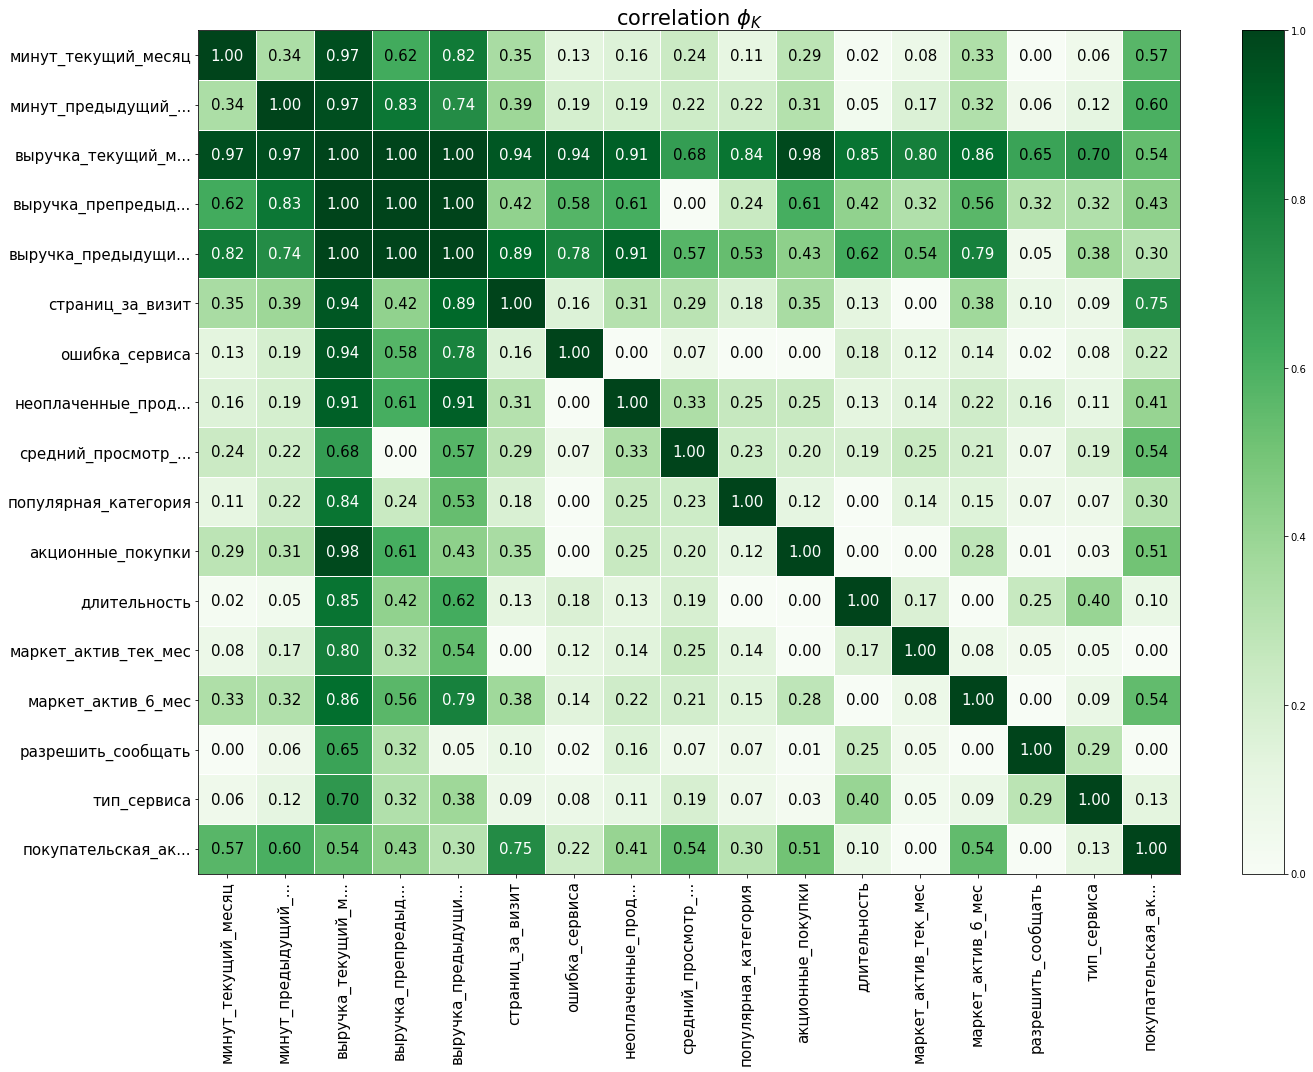

In [52]:
interval_cols = ['маркет_актив_6_мес', 
                 'длительность', 
                 'акционные_покупки',
]

phik_overview = df.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

**Вывод:**   мы видим высокую корреляцию между следущими признаками: 
- минут текущий месяц и вырука текущий месяц -0.97, 
- минут текущий месяц и выручка предыдущий месяц - 0.82, 
- минут предыдущий месяц и выручка текущий месяц - 0.97, 
- минут предыдущий месяц и выручка препредыдущий месяц - 0,83,
- минут предыдущий месяц и выручка предыдущий месяц - 0,74,
- выручка текущий месяц и выручка предыдущий/ препредыдущий месяц - 1,
- выручка текущий месяц и страниц за визит - 0,94,
- выручка текущий месяц и ошибка сервиса - 0,94,
- выручка текущий месяц и неоплаченные_продукты_штук_квартал - 0,91
- выручка текущий месяц и популярная_категория - 0,84 
- выручка текущий месяц и акционные_покупки - 0,98
- выручка текущий месяц и длительность - 0,85
- выручка текущий месяц и маркет_актив_тек_мес - 0,80
- выручка текущий месяц и маркет_актив_6_мес - 0,86
- выручка предыдущий месяц и страниц за визит - 0,89
- выручка предыдущий месяц и ошибка сервиса - 0,78
- выручка предыдущий месяц и неоплаченные_продукты_штук_квартал - 0,91
- выручка предыдущий месяц и маркет_актив_6_мес - 0,79

Высокие коэффициенты вполне логичны, чем больше времени пользователь проводит на сайте, чем больше акций, тем больше вероятность, что он купит товар, тем выше будет выручка. 

Не ясно из-за чего высокая корреляция между выручкой и ошибкой сервиса, и неоплаченные_продукты_штук_квартал. Здесь я логики не наблюдаю.

О мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95, у нас таких коэффициентов достаточно много. Из всех моделей МО сильнее всего страдает от корреляции входных признаков линейная регрессия. Логистическая регрессия также уязвима перед мультиколлинеарностью, но в меньшей степени. Так как мы не будем использовать линейнкю регрессию, оставим мультиколлинеарность признаков.

# 6. Использование пайплайнов

Разбиваем на тренировочную и тестовую выборки, закодируем целевой признак и введем обозначения для типов исходных данных.

In [53]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X = df.drop('покупательская_активность', axis=1)
y = df['покупательская_активность']


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE,
    test_size = TEST_SIZE,
    stratify = y
)


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


ohe_columns = [
    'тип_сервиса',
    'популярная_категория'
]

ord_columns = [
    'разрешить_сообщать']

num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц',
    'акционные_покупки'
]

num_columns1 = [
    'длительность'
]

Создаем пайплайн для подготовки признаков из списка ohe_columns.

In [54]:
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe',
         SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        ('ohe',
         OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
        )
    ]
 )

In [55]:
ord_pipe = Pipeline(
    [
        (
            'simple_imputer_ord_before',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(categories=[
                                      ['да','нет']],
                          handle_unknown='use_encoded_value',
                          unknown_value=np.nan)
        ),
        (
            'simple_imputer_ord_after',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

Создаем общий пайплайн для подготовки данных.

In [56]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns),
        ('num1', MinMaxScaler(), num_columns1)
    ],
        remainder='passthrough'
)

Создаем итоговый пайплайн.

In [57]:
pipe_final = Pipeline(
    [
        ('preprocessor', 
         data_preprocessor
        ),
        ('models', 
        DecisionTreeClassifier(random_state=RANDOM_STATE)
        )
    ]
)

Создаем словарь гиперпараметров с моделями KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC().

In [58]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

Для оценки модели выберем метрику ROC AUC, данная метрика позволяет оценивать качество модели, не выбирая порог разбиения на классы, поскольку ей на вход подаются не классы, а вероятности.

In [59]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [60]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['тип_сервиса',
                                                                                'популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps...
                                         'models__n_neighbors': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [61]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print (f'Метрика лучшей модели на тренировочной выборке: {round(randomized_search.best_score_, 4)}')


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['тип_сервиса',
                                                   'популярная_категория']),
                                                 ('ord',
                                        

Лучшей моделью оказалась модедь SVC с метрикой roc_auc 0,9097.

Проверим работу модели на тестовой выборке.

In [62]:
y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_pred[:,1]), 4)}')

Метрика ROC-AUC на тестовой выборке: 0.9134


Метрика на тестовой выборке выросла и стала 0,9134.

**Вывод:** лучшей моделью оказалась SVC модель. Метрика roc_auc на тренировочных данных 0,9097 на тестовых 0,9134.

#  7. Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.

Using 324 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/324 [00:00<?, ?it/s]

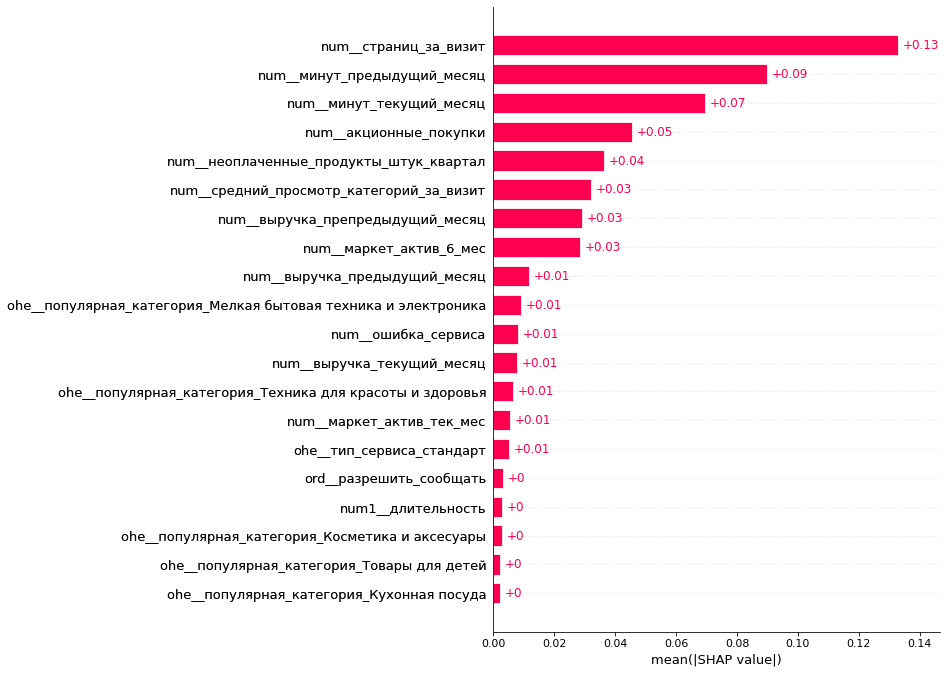

In [63]:
best_model = randomized_search.best_estimator_
data_preprocessor = best_model.named_steps['preprocessor']

X_transformed = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()
)

explainer = shap.KernelExplainer(best_model.named_steps['models'].predict, X_transformed)
shap_values = explainer(X_transformed)
shap.plots.bar(shap_values, max_display=20) 



**Вывод:** 
Наиболее важными признаками оказались:
 - страниц_за_визит
 - минут_предыдущий_месяц
 - минут_текущий_месяц
 - акционные_покупки
 
Наименее важными признаками оказались:
- длительность
- популярные категории товаров - кухонная посуда, товары для детей, косметика и аксессуары.

Используя эти наблюдения, можно иметь ввиду, что для увеличения прибыли и активности пользователей нужно обращать внимание на количество времени, которое пользователь проводит на сайте, из этого вытекает и количество страниц- чем дольше времени на сайте , тем больше просмотренных страниц. Также важны акционные покупки,здесь очевидно, акции привлекают больше покупателей.

# 8. Сегментация покупателей

## 8.1 Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.

Для начала добавим столбец вероятность активности, показывающий вероятность того, снизится или увеличится активность пользователей.

In [64]:
X_test['вероятность_активности'] = y_test_pred[:, 1]
df_final_test= X_test.sort_values(by='вероятность_активности')
df_final_test.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_активности
id,,,,,,,,,,,,,,,,,
216465,стандарт,да,4.9,4,739,0.17,Мелкая бытовая техника и электроника,5,1,4,4,5505.5,5180.0,5917.6,18,15,0.020831
215837,премиум,да,4.9,3,888,0.14,Техника для красоты и здоровья,3,1,6,9,4893.0,5268.0,4698.0,15,18,0.022673
216047,премиум,да,3.9,4,572,0.14,Мелкая бытовая техника и электроника,4,2,2,6,5696.5,5194.0,6262.0,16,18,0.022828
216412,стандарт,да,5.5,3,847,0.11,Мелкая бытовая техника и электроника,5,1,5,4,5227.0,5233.0,5351.8,14,16,0.023829
215805,стандарт,нет,4.1,4,808,0.15,Мелкая бытовая техника и электроника,4,2,3,13,4126.0,4691.0,4746.1,12,16,0.024454


Теперь, используя список колонок с количественными признаками, построим диаграммы распределения признаков от вероятной активности пользователей.

In [65]:
num_columns_segment = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц',
    'акционные_покупки'
]

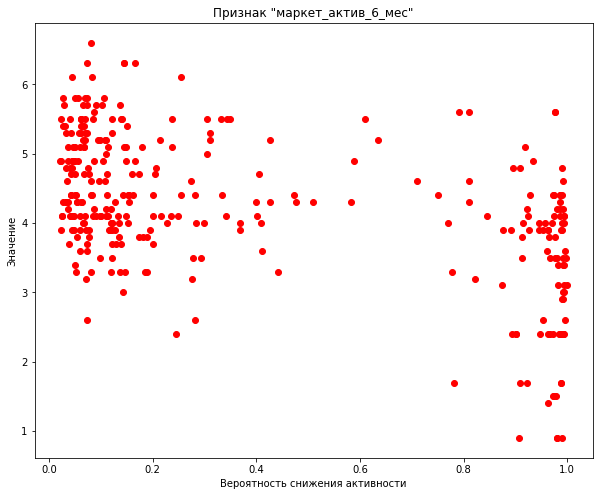

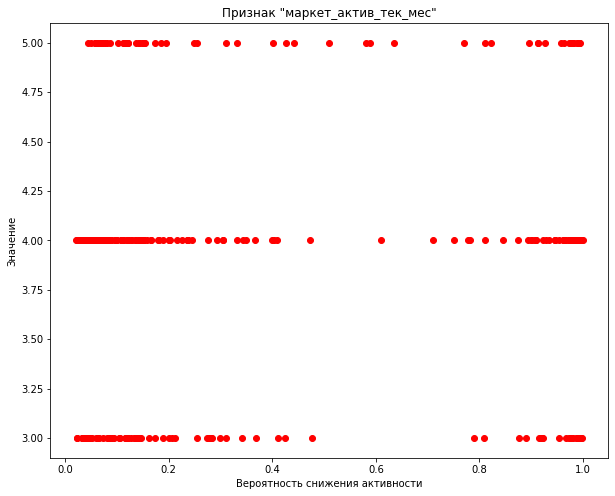

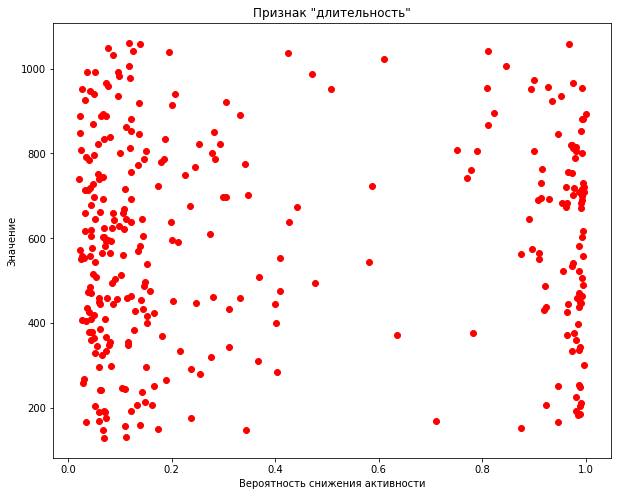

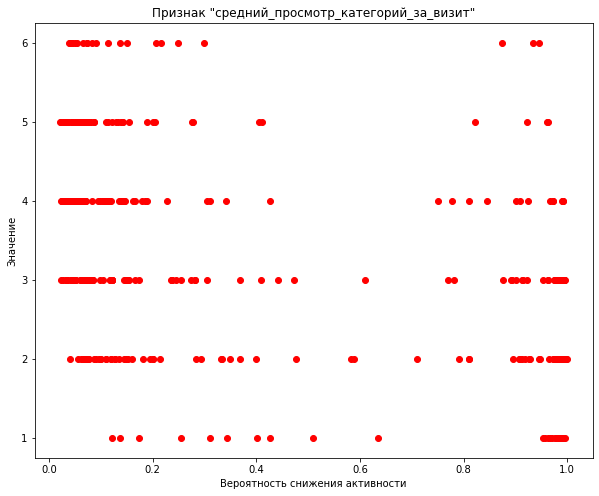

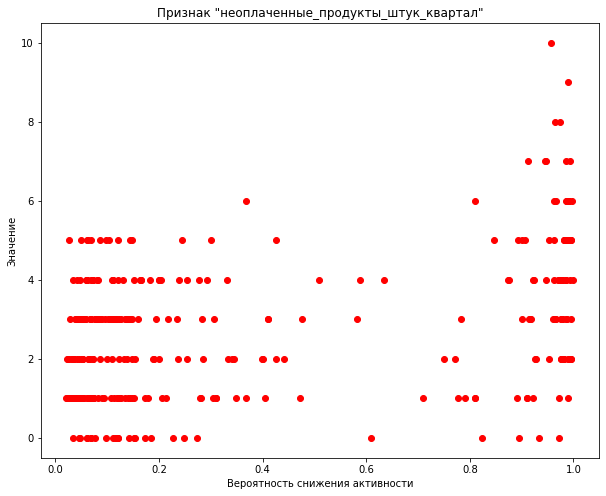

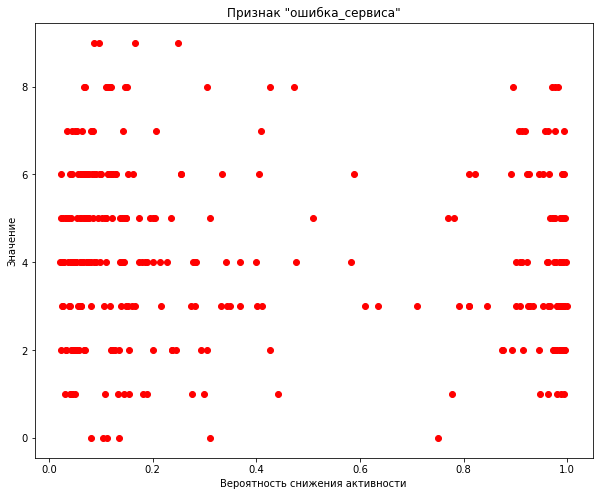

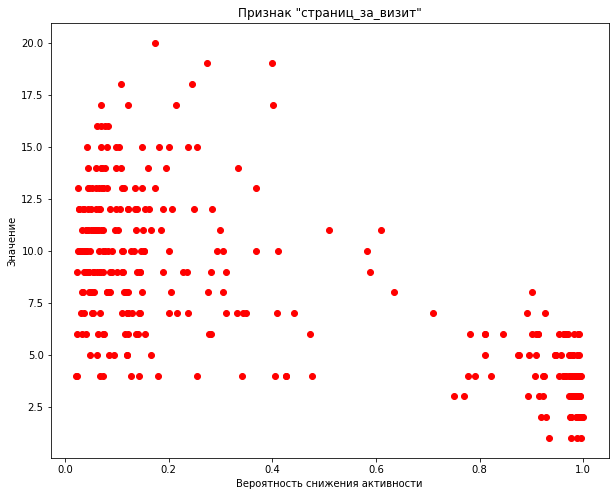

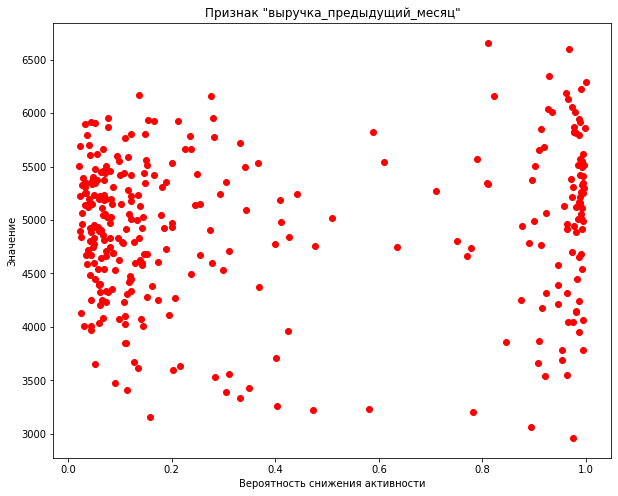

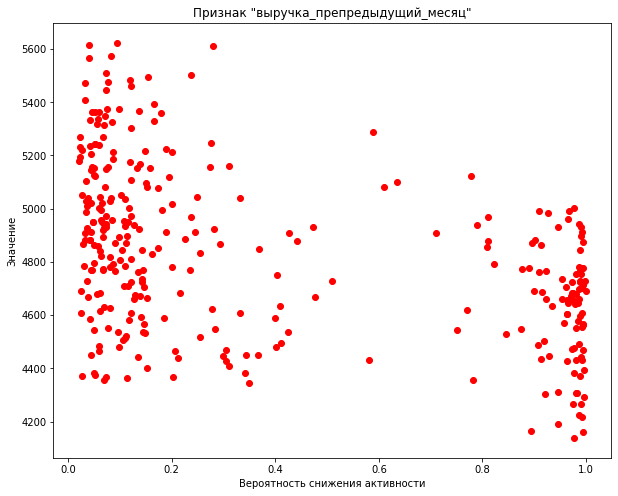

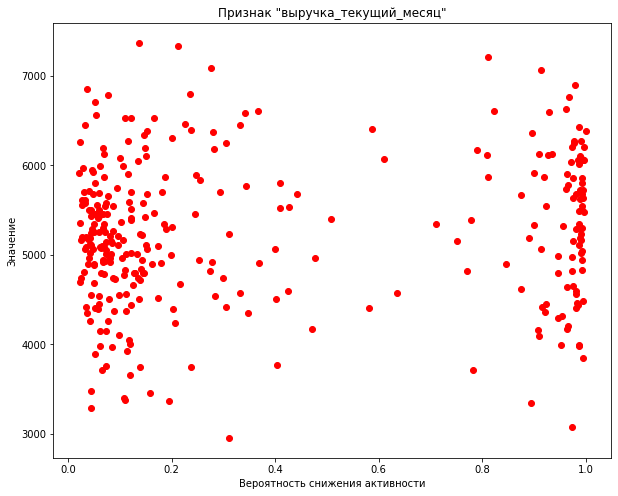

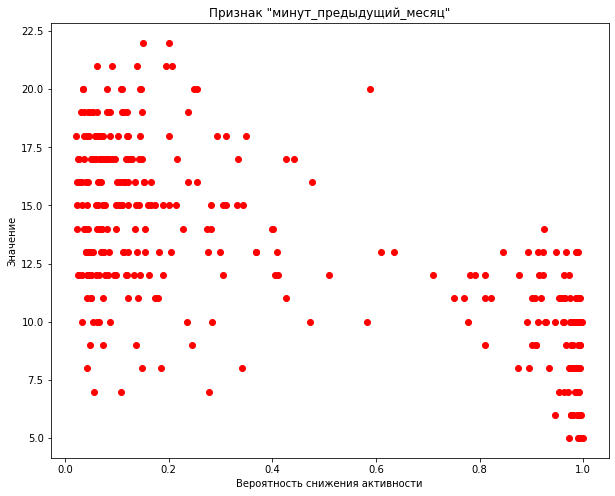

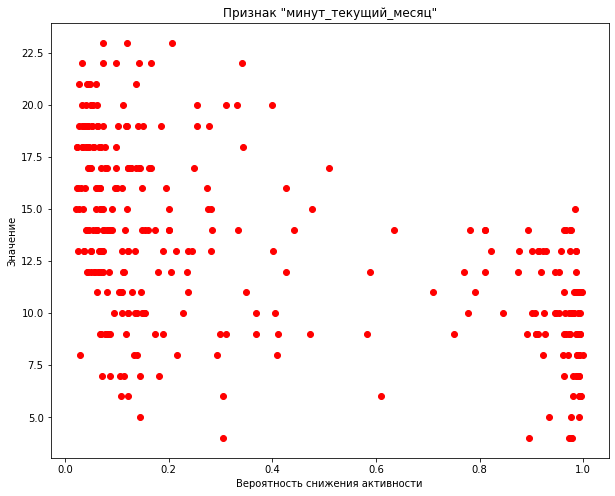

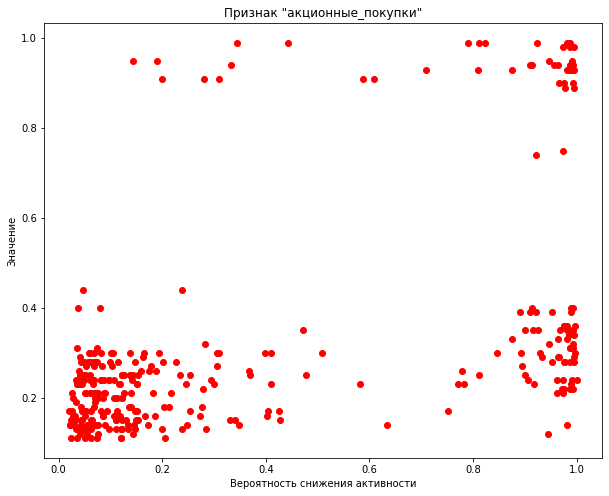

In [66]:
for column in num_columns_segment:
    plt.figure(figsize=(10, 8))
    plt.title(f'Признак "{column}"')
    plt.xlabel('Вероятность cнижения активности')
    plt.ylabel(f'Значение')
    plt.scatter(x=df_final_test['вероятность_активности'], 
                y=df_final_test[column],
                alpha=1, 
                color='Red')

Исходя из полученных диаграмм можно выделить следующие признаки:
- маркет_6_мес -вероятность снижение активности у пользователей, с которыми контактировали(маркетинговые коммуникации) менее 3-х раз..
- неоплаченные_продукты_штук_квартал - пользователи, которые имеют в корзине от 6 и выше неоплаченных товаров, имеют вероятность снижения активности. 
- страниц_за_визит - пользователи, которые листают не более 8 страниц за визит, имеют вероятность снижения активности. 
- выручка_препредыдущий_месяц - пользователи, выручка от которых не превышает 5000, имеют вероятность снижения активности
- минут_предыдущий_месяц - пользователи, которые находятся на сайте менее 14 минут, имеют вероятность снижения активности
- минкт_текущий_месяц - пользователи, которые находятся на сайте менее 15 минут, имеют вероятность снижения активности
- акционные_покупки - пользователи, которые в основном покупают товары по акции, значение от 0.8, имеют вероятность снижения активности.

По остальным признакам сделать вывод сложно. Распределение пользователей примерно одинаковое.

Теперь проверик категориальные признаки, используя список ohe_columns.

In [67]:
ohe_columns_segment = [
    'тип_сервиса',
    'разрешить_сообщать',
    'популярная_категория'
]

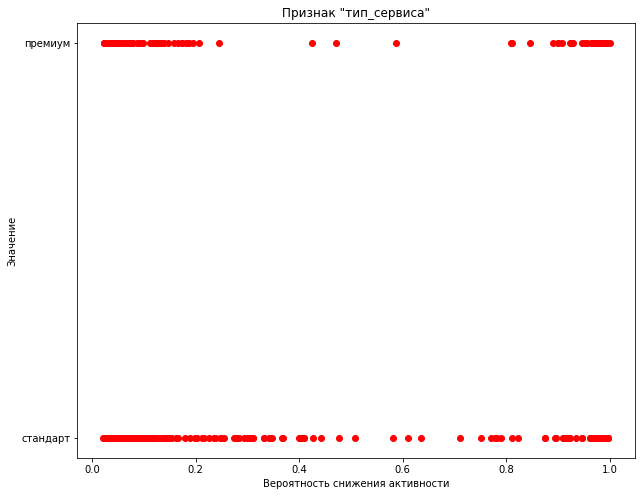

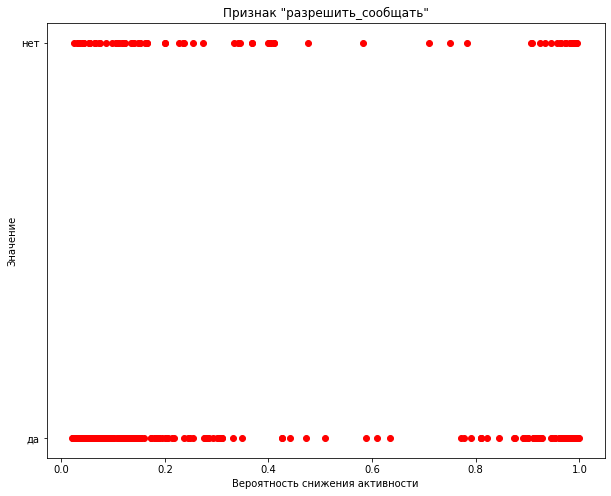

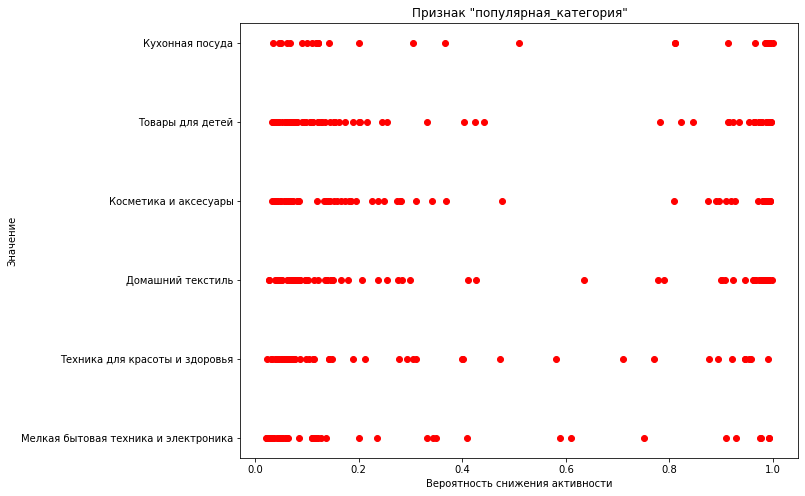

In [68]:
for column in ohe_columns_segment:
    plt.figure(figsize=(10, 8))
    plt.title(f'Признак "{column}"')
    plt.xlabel('Вероятность cнижения активности')
    plt.ylabel(f'Значение')
    plt.scatter(x=df_final_test['вероятность_активности'], 
                y=df_final_test[column],
                alpha=1, 
                color='Red')

Как мы видим, по категориальным признакам невозможно выделить активность покупателей.

## 8.2 Выберем группу покупателей и предложим, как увеличить её покупательскую активность:

Выберем группу покупателей, которые просматривают мало страниц за визит. При анализе важности признаков это был один из важных. Построим графики количественных и категориальных признаков.

In [69]:
df_segment = df_final_test.query('страниц_за_визит < 8')
df_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 216465 to 215443
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип_сервиса                          154 non-null    object 
 1   разрешить_сообщать                   154 non-null    object 
 2   маркет_актив_6_мес                   154 non-null    float64
 3   маркет_актив_тек_мес                 154 non-null    int64  
 4   длительность                         154 non-null    int64  
 5   акционные_покупки                    154 non-null    float64
 6   популярная_категория                 154 non-null    object 
 7   средний_просмотр_категорий_за_визит  154 non-null    int64  
 8   неоплаченные_продукты_штук_квартал   154 non-null    int64  
 9   ошибка_сервиса                       154 non-null    int64  
 10  страниц_за_визит                     154 non-null    int64  
 11  выручка_предыдущий_месяц

In [70]:
df_segment.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_активности
id,,,,,,,,,,,,,,,,,
216465,стандарт,да,4.9,4,739,0.17,Мелкая бытовая техника и электроника,5,1,4,4,5505.5,5180.0,5917.6,18,15,0.020831
216047,премиум,да,3.9,4,572,0.14,Мелкая бытовая техника и электроника,4,2,2,6,5696.5,5194.0,6262.0,16,18,0.022828
216412,стандарт,да,5.5,3,847,0.11,Мелкая бытовая техника и электроника,5,1,5,4,5227.0,5233.0,5351.8,14,16,0.023829
215850,стандарт,да,5.4,4,267,0.15,Техника для красоты и здоровья,5,1,1,7,4009.0,4783.0,4809.8,19,16,0.030663
216116,стандарт,нет,5.3,3,660,0.19,Товары для детей,4,1,2,6,5138.0,4907.0,5067.8,15,20,0.033448


In [71]:
num_columns_cont = [
    'маркет_актив_6_мес',
    'длительность',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц',
    'акционные_покупки'
]

num_columns_disc = [
    'маркет_актив_тек_мес',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
]

Таких покупателей не так много. Всего 154.

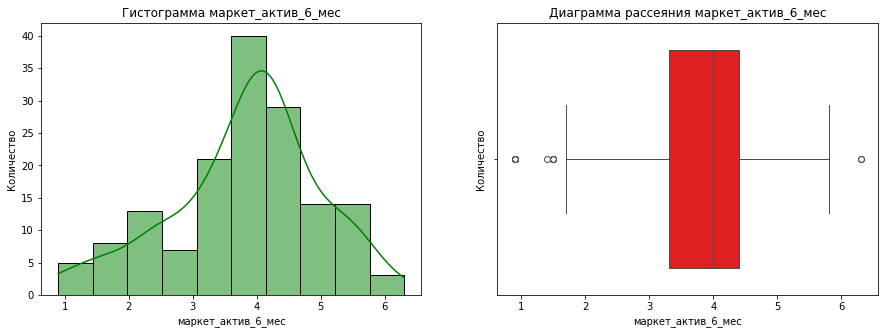

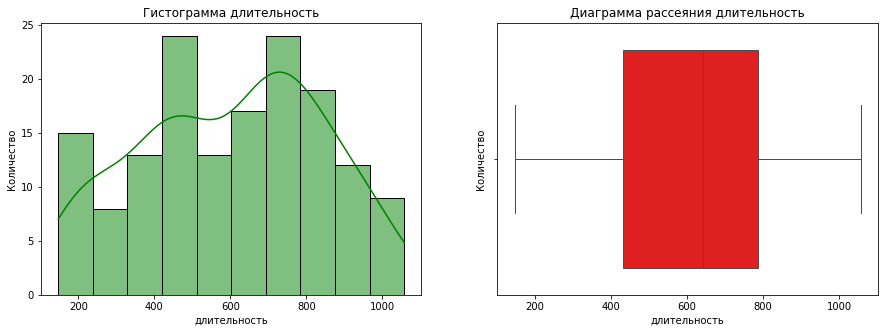

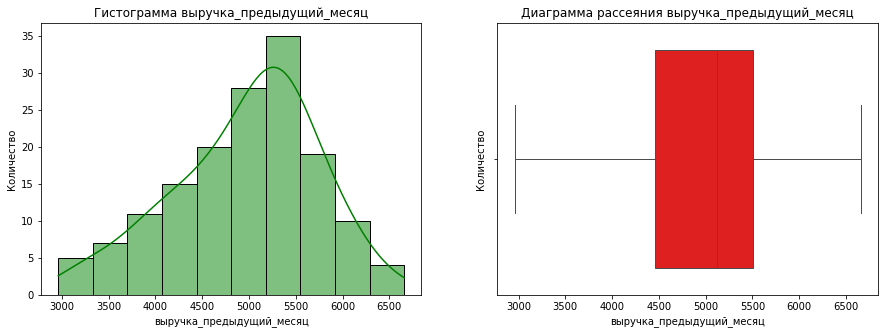

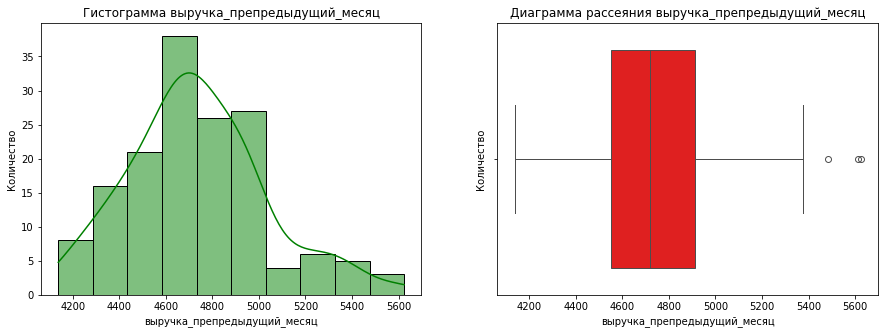

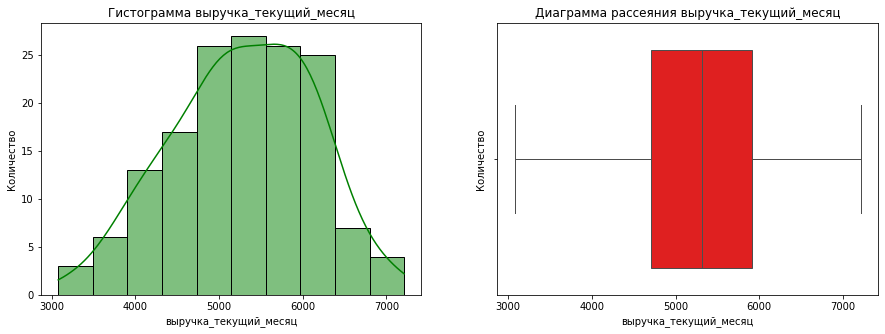

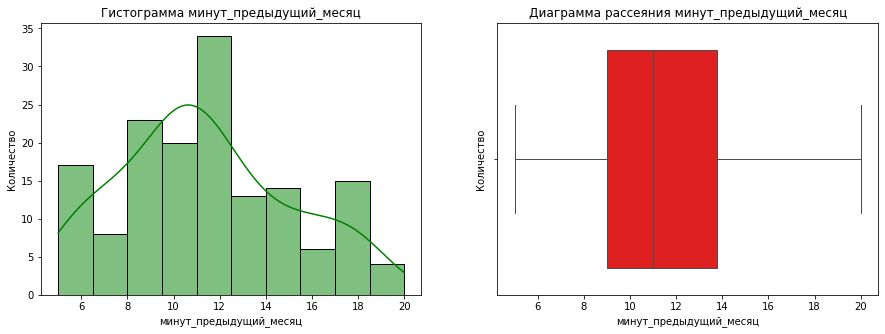

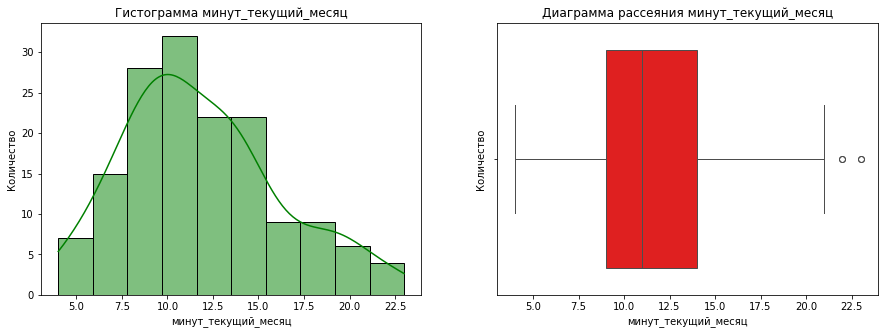

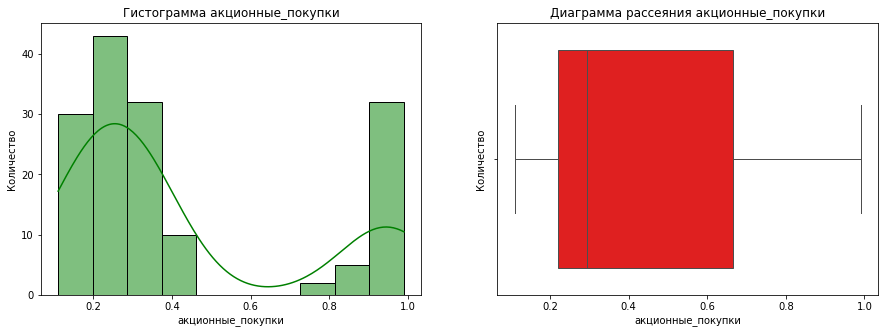

In [72]:
for column in num_columns_cont:
    hist_box_plot(df_segment, column)

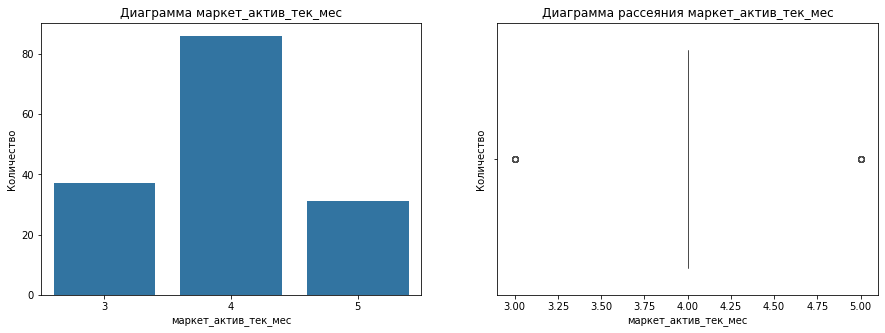

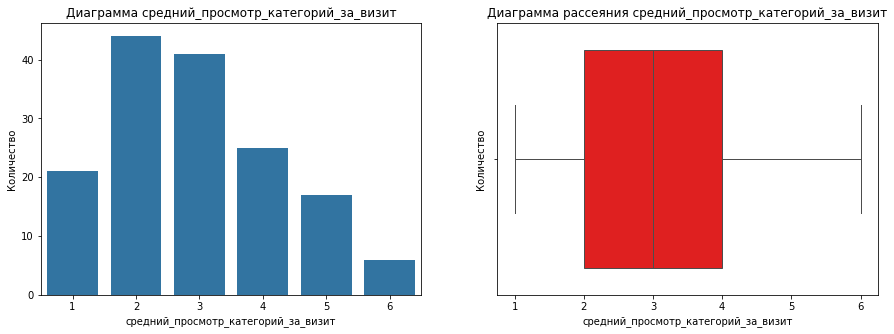

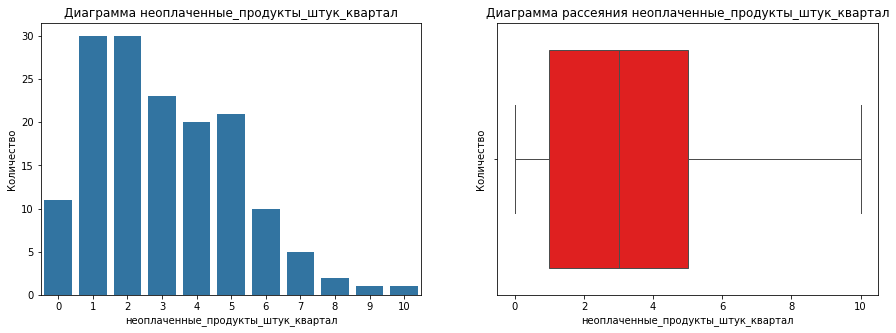

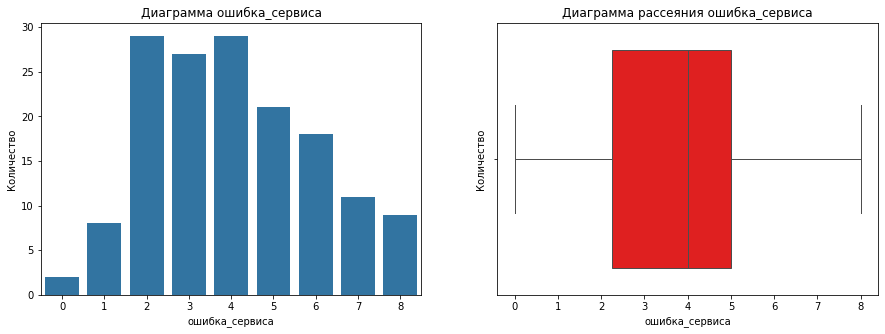

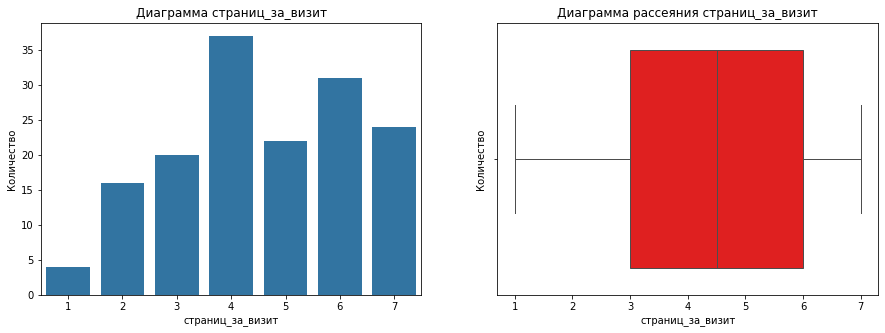

In [73]:
for column in num_columns_disc:
    count_box_plot(df_segment, column)

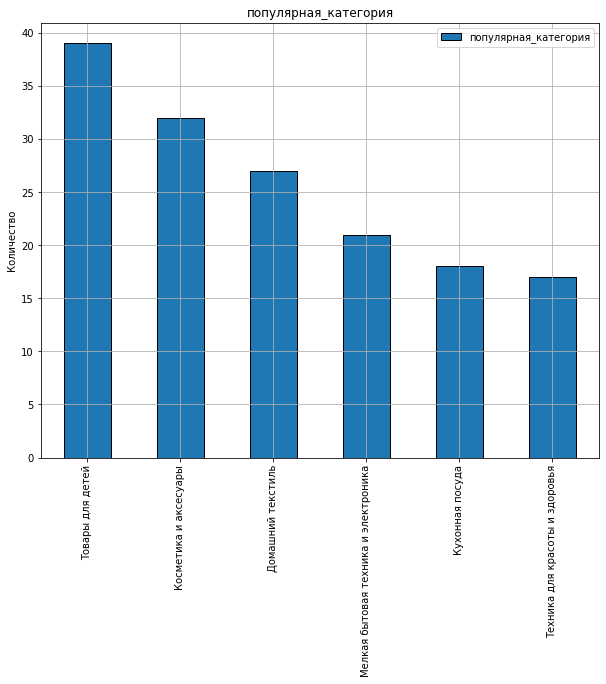

In [74]:
df_segment['популярная_категория'].value_counts().plot.bar(figsize=(10, 8), ec='black', legend=True, grid=True)
plt.title('популярная_категория')
plt.ylabel('Количество')
plt.show()

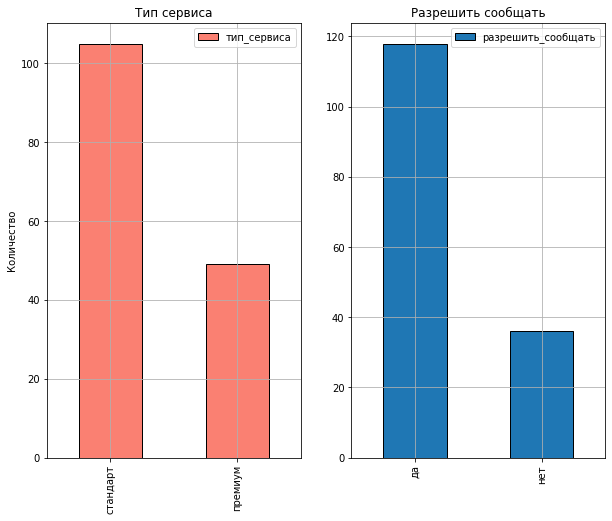

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8),)
df_segment['тип_сервиса'].value_counts().plot.bar(ec='black', legend=True, grid=True,color='Salmon', ax=axes[0])
df_segment['разрешить_сообщать'].value_counts().plot.bar(ec='black', legend=True, grid=True, ax=axes[1])

axes[0].set_title('Тип сервиса')
axes[0].set_ylabel('Количество')
axes[1].set_title('Разрешить сообщать')

plt.show()

**Вывод:** Выбранный сегмент достаточно редко покупает товары по акции, несмотря на то, то они получают в среднем около 4х предложениий/рассылки. За визит они просматривают в среднем  2-3 категории за визит. Основная группа товаров - товары для детей, косметика и аксессуары, домашний текстиль. Проводят в среднем от 8 до 15 мин на сайте.

Данный сегмент пользователей имеет определенную цель при покупке товаров, не хотят тратить много времени на сайте. Исходя из полученных данных возможно стоит для этих пользователей чаще делать акции на товары для детей, косметика и аксессуары, домашний текстиль. Причем информацию об акции показывать на первой страницы и чаще отправлять рассылку. Времени пользователь будет тратить также мало, но будет чаще покупать нужные ему товары, тем самым принося больше прибыли.

 # 9. Общий вывод
 

1. Описание задачи:

Было необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность:

- нужно было построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- в исследование нужно было включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- используя данные модели и данные о прибыльности клиентов, нужно было выделить сегменты покупателей и разработать для них персонализированные предложения.

2. Описание исходных данных и проведённая предобработка:

-  в датасетах не были обнаружены пропуски. Название колонок привести к единому регистру. Тип данных соответсвовал значениям в колонках. Были очевидные ошибки в строках, которые были исправлены.
- на этапе предобработки привели названия столбцов к единому регистру. Пропусков и явных дубликатов не было обнаружено. Убрали ошибки в строках.

3. Для поиска лучшей модели сделали следующее:

- провели исследовательский анализ всех датасетов. Выявили троих пользователей, которые не совершали покупкие последние 3 месяца. Обновили все датасеты с учетов этих данных. Создали один общий датасет с разбивкой прибыли и времени по периодам. Выявили и заполнили один пропуск.
-  провели корреляционный анализ
- использовали паплайн для выявления лучшей модели

4. Лучшей моделью оказалась SVC модель. Метрика roc_auc на тренировочных данных 0,9097 на тестовых 0,9134.


5. При помощи Shap провели анализ важности признаков. 

Наиболее важными признаками оказались:
 - страниц_за_визит
 - минут_предыдущий_месяц
 - минут_текущий_месяц
 - акционные_покупки
 
Наименее важными признаками оказались:
- маркет_актив_тек_мес
- популярные категории товаров - кухонная посуда, товары для детей, косметика и аксессуары.


6. Провели сегментацию покупателей. 

Были выделены следующие признаки:
- маркет_6_мес -вероятность снижение активности у пользователей, с которыми контактировали(маркетинговые коммуникации) менее 3-х раз..
- неоплаченные_продукты_штук_квартал - пользователи, которые имеют в корзине от 6 и выше неоплаченных товаров, имеют вероятность снижения активности. 
- страниц_за_визит - пользователи, которые листают не более 8 страниц за визит, имеют вероятность снижения активности. 
- выручка_препредыдущий_месяц - пользователи, выручка от которых не превышает 5000, имеют вероятность снижения активности
- минут_предыдущий_месяц - пользователи, которые находятся на сайте менее 14 минут, имеют вероятность снижения активности
- минкт_текущий_месяц - пользователи, которые находятся на сайте менее 15 минут, имеют вероятность снижения активности
- акционные_покупки - пользователи, которые в основном покупают товары по акции, значение от 0.8, имеют вероятность снижения активности.
Выбрали сегмент страниц_за_визит:

Выбранный сегмент достаточно редко покупает товары по акции, несмотря на то, то они получают в среднем около 4х предложениий/рассылки. За визит они просматривают в среднем  2-3 категории за визит. Основная группа товаров - товары для детей, косметика и аксессуары, домашний текстиль. Проводят в среднем от 8 до 15 мин на сайте.

**Рекомендации**

Данный сегмент пользователей имеет определенную цель при покупке товаров, не хотят тратить много времени на сайте. Исходя из полученных данных возможно стоит для этих пользователей чаще делать акции на товары для детей, косметика и аксессуары, домашний текстиль. Причем информацию об акции показывать на первой страницы и чаще отправлять рассылку. Времени пользователь будет тратить также мало, но будет чаще покупать нужные ему товары, тем самым принося больше прибыли.
